In [1]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [3]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Dataset Info

In [4]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
dataset.target.shape

(569,)

In [6]:
dataset.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
dataset.data.shape

(569, 30)

# Preprocessing

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train[0]

array([0.09318946, 0.20459926, 0.10331007, 0.04313892, 0.37907376,
       0.35929046, 0.21703374, 0.11471173, 0.12373737, 0.4564027 ,
       0.07304001, 0.13673533, 0.11888046, 0.01893545, 0.56555733,
       0.4907922 , 0.23391414, 0.43720402, 0.29784613, 0.16259   ,
       0.0527926 , 0.14371087, 0.06439564, 0.02084153, 0.31739455,
       0.15582463, 0.12332268, 0.13216495, 0.01714962, 0.14548078])

# Evaluation

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def caculate_metrics(model, y_train = y_train, y_test = y_test):
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))
    p = precision_score(y_test, model.predict(X_test))
    r = recall_score(y_test, model.predict(X_test))

    print(f"acc train: {acc_train}, acc test: {acc_test}, precission: {p}, recall: {r}")

    return acc_train, acc_test, p, r

# Classification

## 1. Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

acc_train_nb, acc_test_nb, p_nb, r_nb = caculate_metrics(gnb)

acc train: 0.9384615384615385, acc test: 0.9298245614035088, precission: 0.953125, recall: 0.9242424242424242


## 2. KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)

acc_train_knn, acc_test_knn, p_knn, r_knn = caculate_metrics(knn)

acc train: 0.9692307692307692, acc test: 0.9736842105263158, precission: 1.0, recall: 0.9545454545454546


## 3. Decision Trees

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=128, min_samples_split=16, criterion='entropy')
dt.fit(X_train, y_train)

acc_train_dt, acc_test_dt, p_dt, r_dt = caculate_metrics(dt)

acc train: 0.9758241758241758, acc test: 0.9298245614035088, precission: 0.967741935483871, recall: 0.9090909090909091


## 4. Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(X_train, y_train)

acc_train_rf, acc_test_rf, p_rf, r_rf = caculate_metrics(rf)

acc train: 0.9934065934065934, acc test: 0.9824561403508771, precission: 0.9848484848484849, recall: 0.9848484848484849


## 5. SVM

In [48]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

acc_train_svm, acc_test_svm, p_svm, r_svm = caculate_metrics(svc)

acc train: 0.9824175824175824, acc test: 0.9824561403508771, precission: 1.0, recall: 0.9696969696969697


## 6. Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

acc_train_lr, acc_test_lr, p_lr, r_lr = caculate_metrics(lr)

acc train: 0.967032967032967, acc test: 0.9912280701754386, precission: 1.0, recall: 0.9848484848484849


## 7. ANN

In [50]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256, activation='relu', solver='adam', batch_size=64)
ann.fit(X_train, y_train)

acc_train_ann, acc_test_ann, p_ann, r_ann = caculate_metrics(ann)

acc train: 0.9846153846153847, acc test: 0.9736842105263158, precission: 0.9846153846153847, recall: 0.9696969696969697


/home/amirvahedix/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Comparison

### Training Accuracy

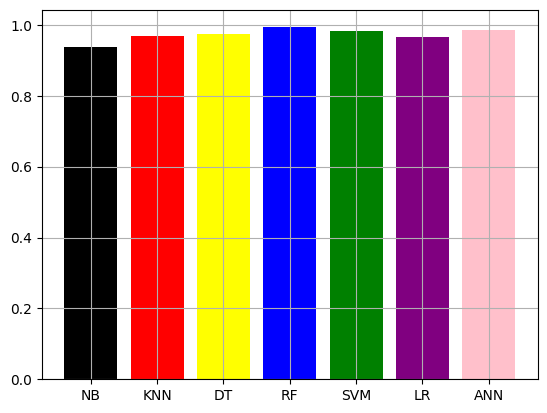

In [55]:
import matplotlib.pyplot as plt

acc_train = [acc_train_nb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["NB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['black', 'red', 'yellow', 'blue', 'green', 'purple', 'pink']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

### Test Accuracy

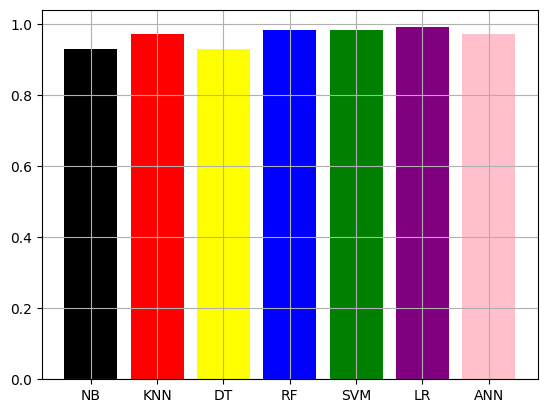

In [57]:
acc_test = [acc_test_nb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["NB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['black', 'red', 'yellow', 'blue', 'green', 'purple', 'pink']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

### Precission

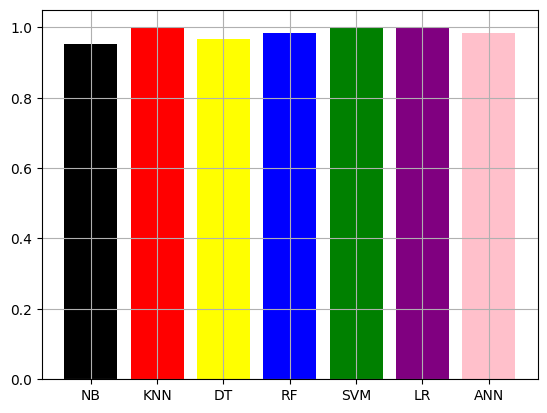

In [58]:
p = [p_nb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["NB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['black', 'red', 'yellow', 'blue', 'green', 'purple', 'pink']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

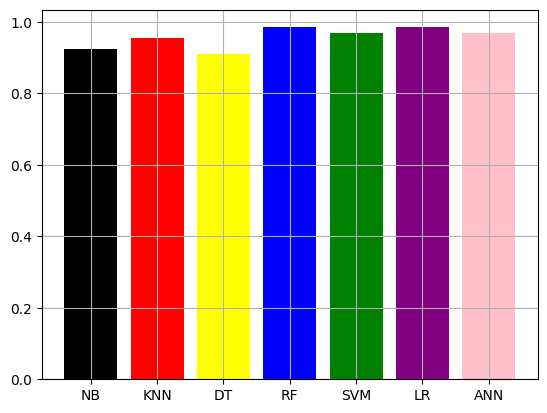

In [60]:
r = [r_nb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["NB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['black', 'red', 'yellow', 'blue', 'green', 'purple', 'pink']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()